In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import problem_description
%run problem_description.py  # my problem specs
import data_processing
%run data_processing.py   # data processing

# Computational Model 
This analysis was performed on the Electronic Drug Delivery System (EDDS) with the following geometry, boundary conditions, and solver specifications. 

#### Operating Conditions
Boundary Conditions
- Inlet velocity: 0.630 [m s^-1]
- Outlet Pressure: 101.33 [kPa]
- Nonslip Walls

Solver Tolerance
- Residual Target: 1e-05 

System State
- Steady State

Fluid Type
- Air at room temperature (incompressible fluid)

In [2]:

print('GEOMETRY SPECIFICATIONS: \n',geom_db,'\n',coil10,'\n \n MESH SPECIFICATIONS: \n', mesh_stats)

GEOMETRY SPECIFICATIONS: 
         label  Diameter[mm]  Length[mm]  Thickness[mm]
0  Mouthpiece          8.02      13.960           0.13
1        Pipe          4.54      27.955           0.15
2    Atomizer          4.54       7.500           0.15
3  Inlet Pipe          4.54       2.170           0.15 
 {'Coil_qty': 10, 'Coil_Diameter': 0.3, 'Coil_Spacing': 0.5} 
 
 MESH SPECIFICATIONS: 
 {'Nodes': 2278204, 'Elements': 13225239}


### Results - Nominal Case

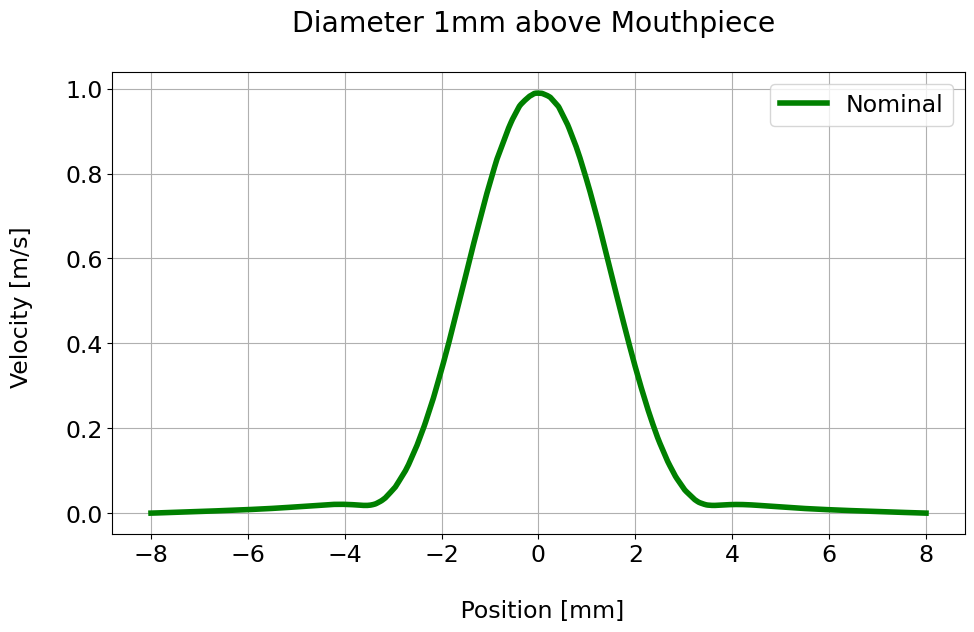

In [3]:
plt.figure(figsize=(11,6))
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('Diameter 1mm above Mouthpiece \n')
plt.plot((nominal[' Y [ m ]']-center)*1e3, nominal[' Velocity [ m s^-1 ]'],'-',color='green', label='Nominal',linewidth=4)
plt.legend()
plt.grid()
plt.savefig('figures/simulation_nominal.png', dpi=300)

### Results - Sampling Case
To generate simulation samples, the volumetric flow rate (VFR) was measured in three replicate experiments. The following inlet velocities were obtained, considering the input uncertainty associated with the VFR. 

Inlet Velocity by Sample 
- Sample 1: 0.63000 [m/s]
- Sample 2: 0.63329 [m/s]
- Sample 3: 0.06420 [m/s]

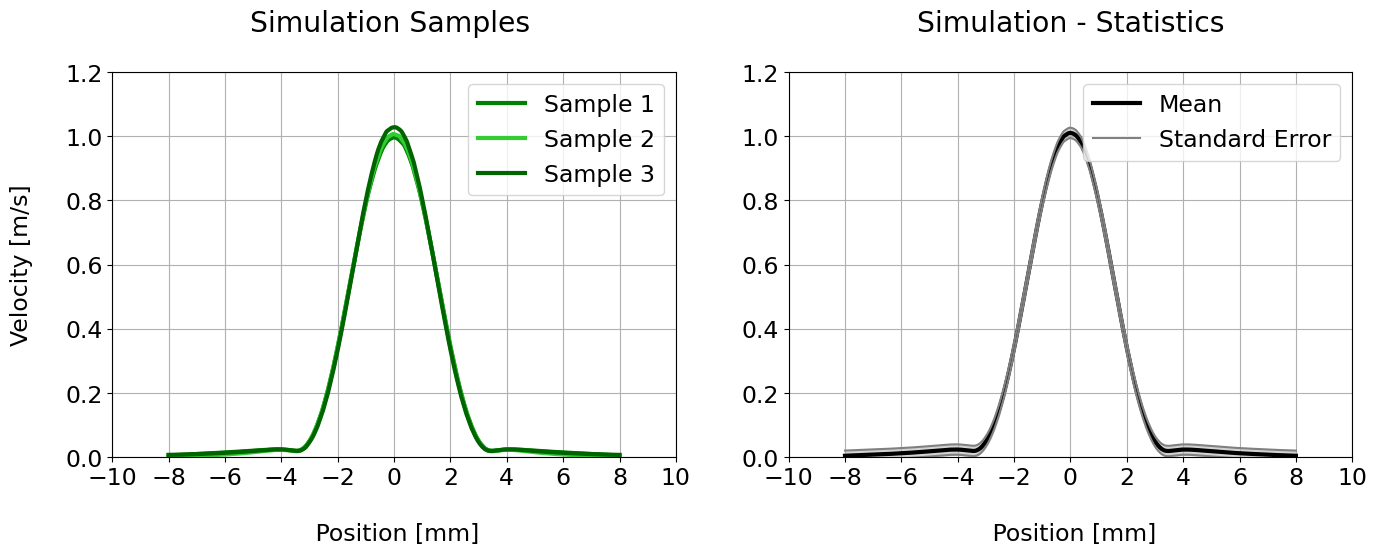

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s]\n')
plt.title('Simulation Samples \n')
plt.axis([-10,10,0,1.2])
plt.plot((sim1[' Y [ m ]']-center1)*1e3, sim1[' Velocity [ m s^-1 ]'],'-',color='green', label='Sample 1',linewidth=3)
plt.plot((sim2[' Y [ m ]']-center2)*1e3, sim2[' Velocity [ m s^-1 ]'],'-',color='limegreen', label='Sample 2',linewidth=3)
plt.plot((sim3[' Y [ m ]']-center3)*1e3, sim3[' Velocity [ m s^-1 ]'],'-',color='darkgreen', label='Sample 3',linewidth=3)
plt.legend(loc='upper right')
plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('\n Position [mm]')
plt.title('Simulation - Statistics\n')
plt.axis([-10,10,0,1.2])
plt.plot((sim1[' Y [ m ]']-center1)*1e3, avgsim, '-k', linewidth=3, label='Mean')
plt.plot((sim2[' Y [ m ]']-center2)*1e3, plussim,linestyle='-',label="Standard Error",color="gray")
plt.plot((sim3[' Y [ m ]']-center3)*1e3, minussim,linestyle='-',color="gray")
plt.fill_between((sim1[' Y [ m ]']-center1)*1e3,plussim, minussim, color="lightgray")
plt.xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
plt.legend(loc='upper right')
plt.grid()
plt.savefig('figures/simulation_samples.png', dpi=300)

# Experiments

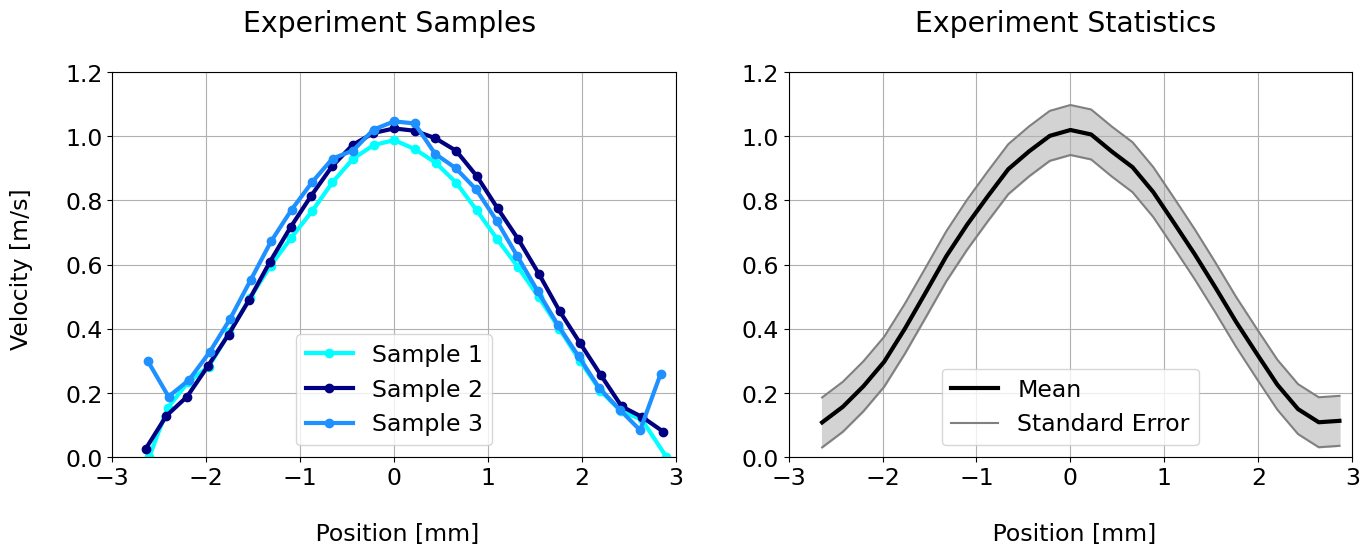

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.xlabel('\n Position [mm]')
plt.ylabel('Velocity [m/s] \n')
plt.title('Experiment Samples \n')
plt.plot(expS1['x (mm)']-5.36,expS1['V (m/s)'],'-o',color='cyan', label='Sample 1',linewidth=3)
plt.plot(expS2['x (mm)']-5.39655,expS2['V (m/s)'],'-o',color='navy', label='Sample 2',linewidth=3)
plt.plot(expS3['x (mm)'][2:]-5.60712,expS3['V (m/s)'][2:],'-o',color='dodgerblue', label='Sample 3',linewidth=3)
plt.axis([-3,3,0,1.2])
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.xlabel('\n Position [mm]')
plt.title('Experiment Statistics \n')
plt.plot(expS2['x (mm)']-5.39655,avgexp, '-k', linewidth=3, label='Mean')
plt.plot(expS2['x (mm)']-5.39655, plus,linestyle='-',label="Standard Error",color="gray")
plt.plot(expS2['x (mm)']-5.39655, minus,linestyle='-',color="gray")
plt.fill_between(expS2['x (mm)']-5.39655,plus, minus, color="lightgray")
plt.axis([-3,3,0,1.2])
plt.legend()
plt.grid()
plt.savefig('figures/experiments_samples.png', dpi=300)